# 1. Importing the librairies

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import Subset


In [55]:
# setting the hyperparameters
num_epochs = 100
batch_size = 32
learning_rate = 0.001

# 2. Loading the dataset: CIFAR-10 

we will see later how to load custom dataset

In [15]:
# loading the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
# using only a subset of the data
trainset = Subset(trainset, range(4000))
testset = Subset(testset, range(4000))

# 3. Creating the dataloaders

In [17]:
trainloader = data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# 4. Creating the models: MLP and CNN


In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [11]:

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 5. Training and testing the models 

In [48]:
def train_and_test(model, train_loader, test_loader, criterion, optimizer, epochs):
    training_accuracy, testing_accuracy = [], []
    
    for epoch in range(epochs):
        
        # training the model
        running_loss = 0.0
        correct, total = 0, 0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad()

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
        training_acc = correct / total
        training_accuracy.append(training_acc)


        # Test the model
        correct, total = 0, 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        
        testing_acc = correct / total
        testing_accuracy.append(testing_acc)
    
        print(f'Epoch {epoch}: training loss: {running_loss:.2f}; training accuracy: {training_acc:.2f}; test accuracy: {(100 * testing_acc):.2f}%')
        
    
    return training_accuracy, testing_accuracy 

In [52]:
cnn = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

cnn_training_accuracy, cnn_testing_accuracy = train_and_test(cnn, trainloader, testloader, criterion, optimizer, epochs=num_epochs)

Epoch 0: training loss: 286.34; training accuracy: 0.16; test accuracy: 16.18%
Epoch 1: training loss: 280.97; training accuracy: 0.18; test accuracy: 19.57%
Epoch 2: training loss: 266.96; training accuracy: 0.25; test accuracy: 27.18%
Epoch 3: training loss: 251.66; training accuracy: 0.29; test accuracy: 31.82%
Epoch 4: training loss: 240.43; training accuracy: 0.33; test accuracy: 30.80%
Epoch 5: training loss: 231.33; training accuracy: 0.34; test accuracy: 35.05%
Epoch 6: training loss: 224.02; training accuracy: 0.36; test accuracy: 36.95%
Epoch 7: training loss: 217.39; training accuracy: 0.39; test accuracy: 36.68%
Epoch 8: training loss: 211.15; training accuracy: 0.40; test accuracy: 40.08%
Epoch 9: training loss: 205.19; training accuracy: 0.41; test accuracy: 39.85%
Epoch 10: training loss: 199.82; training accuracy: 0.43; test accuracy: 41.45%
Epoch 11: training loss: 194.67; training accuracy: 0.44; test accuracy: 41.65%
Epoch 12: training loss: 189.83; training accuracy

In [53]:
mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)

mlp_training_accuracy, mlp_testing_accuracy = train_and_test(mlp, trainloader, testloader, criterion, optimizer, epochs=num_epochs)

Epoch 0: training loss: 282.44; training accuracy: 0.20; test accuracy: 23.12%
Epoch 1: training loss: 267.84; training accuracy: 0.26; test accuracy: 26.62%
Epoch 2: training loss: 254.66; training accuracy: 0.29; test accuracy: 30.12%
Epoch 3: training loss: 243.75; training accuracy: 0.33; test accuracy: 31.87%
Epoch 4: training loss: 234.68; training accuracy: 0.35; test accuracy: 34.15%
Epoch 5: training loss: 227.04; training accuracy: 0.37; test accuracy: 35.75%
Epoch 6: training loss: 220.36; training accuracy: 0.39; test accuracy: 36.88%
Epoch 7: training loss: 214.35; training accuracy: 0.41; test accuracy: 37.62%
Epoch 8: training loss: 208.90; training accuracy: 0.42; test accuracy: 38.55%
Epoch 9: training loss: 204.14; training accuracy: 0.44; test accuracy: 39.30%
Epoch 10: training loss: 199.46; training accuracy: 0.45; test accuracy: 40.60%
Epoch 11: training loss: 194.70; training accuracy: 0.46; test accuracy: 40.65%
Epoch 12: training loss: 190.27; training accuracy

# 6. Comparing Models Performance

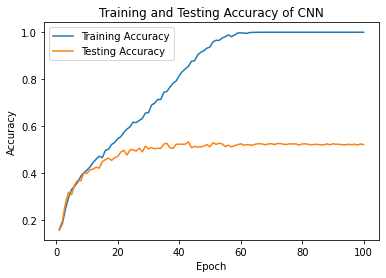

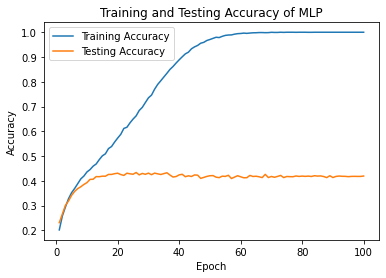

In [64]:
def plot_model_performance(num_epochs, training_accuracy, testing_accuracy, model_name):
    plt.plot(np.arange(num_epochs)+1, training_accuracy, label='Training Accuracy')
    plt.plot(np.arange(num_epochs)+1, testing_accuracy, label='Testing Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Testing Accuracy of {model_name}')
    plt.legend()
    plt.show()

plot_model_performance(num_epochs, cnn_training_accuracy, cnn_testing_accuracy, 'CNN')
plot_model_performance(num_epochs, mlp_training_accuracy, mlp_testing_accuracy, 'MLP')